In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

sns.set()

In [2]:
df_orginal = pd.read_csv("Simple_Fish_Weight_Prediction.csv")
df_orginal.head()

,Weight,Height,Width
0,242.0,11.5200,4.0200
1,290.0,12.4800,4.3056
2,340.0,12.3778,4.6961
3,363.0,12.7300,4.4555
4,450.0,13.6024,4.9274


In [3]:
df = df_orginal.copy()
df.sample(5)

,Weight,Height,Width
3,363.0,12.7300,4.4555
25,32.0,3.5280,1.9992
29,100.0,5.2224,3.3216
33,300.0,6.2884,4.0198
41,8.7,1.9782,1.2852


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  42 non-null     float64
 1   Height  42 non-null     float64
 2   Width   42 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


In [5]:
df.describe()

,Weight,Height,Width
count,42.000000,42.000000,42.000000
mean,204.852381,6.899621,3.379964
std,220.379446,3.570253,1.463534
min,0.000000,1.728400,1.047600
25%,42.875000,4.589100,2.352875
50%,120.000000,6.342200,3.308000
75%,300.000000,8.717900,4.291325
max,1000.000000,14.179500,6.573600


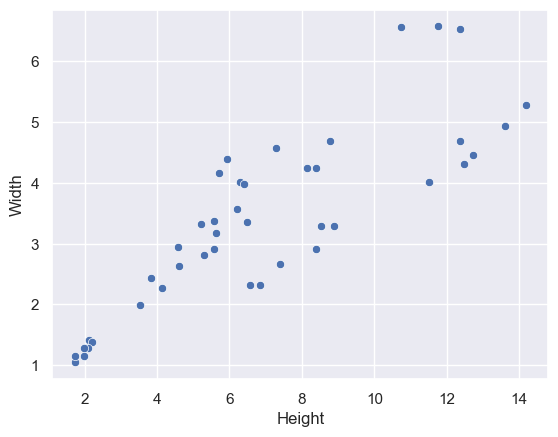

In [6]:
sns.scatterplot(data=df, x="Height", y="Width");

In [13]:
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(df[["Height", "Width"]])
standard_scaled.shape

(42, 2)

In [21]:
df_standard = df.assign(height_standard = standard_scaled[:, 0], width_standard = standard_scaled[:, 1])

In [22]:
df_standard.head()

,Weight,Height,Width,height_standard,width_standard
0,242.0,11.5200,4.0200,1.309819,0.442623
1,290.0,12.4800,4.3056,1.581967,0.640133
2,340.0,12.3778,4.6961,1.552994,0.910187
3,363.0,12.7300,4.4555,1.652839,0.743797
4,450.0,13.6024,4.9274,1.900153,1.070144


In [30]:
Xs = df_standard.iloc[:, 3:]
ys = df_standard["Weight"]

In [32]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

In [33]:
Xs_test.shape

(9, 2)

In [36]:
sreg = LinearRegression()
sreg.fit(Xs_train, ys_train)

LinearRegression()

In [37]:
sreg.score(Xs_test, ys_test)

0.8152070884642971

In [39]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(df[["Height", "Width"]])
robust_scaled

array([[ 1.25406898,  0.36730377],
       [ 1.48658206,  0.51463798],
       [ 1.4618291 ,  0.7160876 ],
       [ 1.54713234,  0.59196781],
       [ 1.7584286 ,  0.83540973],
       [ 1.89820287,  1.01653383],
       [-0.53163147, -0.53651113],
       [-0.25283375, -0.25087054],
       [-0.18567138, -0.20820759],
       [-0.17574114, -0.06881787],
       [-0.03056578,  0.13732621],
       [ 0.03221275,  0.0224922 ],
       [ 0.49365433,  0.48471717],
       [ 0.43673707,  0.48518146],
       [ 0.5899535 ,  0.70860739],
       [ 1.06612091,  1.67866079],
       [ 1.31248789,  1.68464495],
       [ 1.45606472,  1.65957337],
       [ 0.12238423, -0.50633238],
       [ 0.05691726, -0.51267765],
       [ 0.25745979, -0.32758131],
       [ 0.4965123 , -0.20114009],
       [ 0.61775819, -0.00784132],
       [ 0.53172835, -0.00701591],
       [-1.02455919, -0.98016456],
       [-0.6816024 , -0.67517862],
       [-0.60991087, -0.45190745],
       [-0.42380353, -0.34893858],
       [-0.42486921,

In [40]:
df_robust = df.assign(height_robust = robust_scaled[:, 0], width_robust = robust_scaled[:, 1])
df_robust.tail()

,Weight,Height,Width,height_robust,width_robust
37,7.5,1.9720,1.1600,-1.058467,-1.108102
38,7.0,1.7284,1.1484,-1.117468,-1.114086
39,9.7,2.1960,1.3800,-1.004214,-0.994609
40,9.8,2.0832,1.2772,-1.031535,-1.047641
41,8.7,1.9782,1.2852,-1.056966,-1.043514


In [42]:
Xr = df_robust.iloc[:, 3:]
yr = df_robust["Weight"]

In [45]:
yr.shape

(42,)

In [46]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

In [48]:
yr_train.shape

(33,)

In [49]:
rreg = LinearRegression()
rreg.fit(Xr_train, yr_train)

LinearRegression()

In [50]:
rreg.score(Xr_test, yr_test)

0.8152070884642972

In [54]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df[["Height", "Width"]])
minmax_scaled

array([[7.86404414e-01, 5.37893594e-01],
       [8.63506036e-01, 5.89576547e-01],
       [8.55297925e-01, 6.60242490e-01],
       [8.83584583e-01, 6.16702859e-01],
       [9.53650681e-01, 7.02099168e-01],
       [1.00000000e+00, 7.65635179e-01],
       [1.94263961e-01, 2.20846906e-01],
       [2.86713624e-01, 3.21045965e-01],
       [3.08984748e-01, 3.36011582e-01],
       [3.12277630e-01, 3.84907709e-01],
       [3.60417955e-01, 4.57220413e-01],
       [3.81235393e-01, 4.16938111e-01],
       [5.34249986e-01, 5.79080709e-01],
       [5.15376152e-01, 5.79243576e-01],
       [5.66182908e-01, 6.57618531e-01],
       [7.24080603e-01, 9.97900832e-01],
       [8.05776196e-01, 1.00000000e+00],
       [8.53386448e-01, 9.91205212e-01],
       [4.11136365e-01, 2.31433225e-01],
       [3.89427440e-01, 2.29207383e-01],
       [4.55927589e-01, 2.94136808e-01],
       [5.35197693e-01, 3.38490771e-01],
       [5.75402976e-01, 4.06297503e-01],
       [5.46875376e-01, 4.06587043e-01],
       [3.080852

In [55]:
df_minmax = df.assign(height_minmax = minmax_scaled[:, 0], width_minmax = minmax_scaled[:, 1])
df_minmax.sample(5)

,Weight,Height,Width,height_minmax,width_minmax
17,1000.0,12.3540,6.5250,0.853386,0.991205
39,9.7,2.1960,1.3800,0.037555,0.060152
31,300.0,5.7078,4.1580,0.319602,0.562866
35,345.0,6.3960,3.9770,0.374875,0.530112
30,200.0,5.5680,3.3756,0.308374,0.421281


In [57]:
Xm = df_minmax.iloc[:, 3:]
ym = df_minmax.iloc[:, 0]

In [59]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state=42)

In [60]:
Xm_train.shape

(33, 2)

In [61]:
mreg = LinearRegression()
mreg.fit(Xm_train, ym_train)

LinearRegression()

In [62]:
mreg.score(Xm_test, ym_test)

0.8152070884642971

In [66]:
yr_pred = rreg.predict(Xr_test)
yr_pred.shape

(9,)

In [67]:
yr_true = yr_test
yr_true.shape

(9,)

In [68]:
df_pred_vs_true = pd.DataFrame({"True":yr_true, "Pred":yr_pred})
df_pred_vs_true.T

,25,13,8,26,4,39,19,29,30
True,32.000000,270.000000,78.000000,40.000000,450.000000,9.700000,60.000000,100.000000,200.000000
Pred,22.655088,331.224652,145.629978,85.797244,398.512541,-61.902325,50.585637,210.557892,216.472641


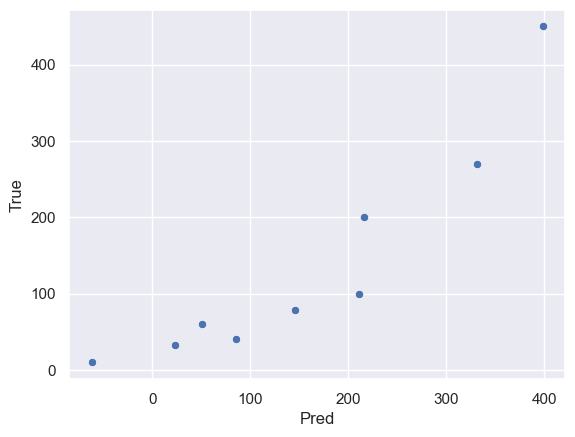

In [70]:
sns.scatterplot(data=df_pred_vs_true, x="Pred", y="True");